In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
x,y = np.linspace(-5,5,300), np.linspace(-5,5,300)
X,Y = np.meshgrid(x,y)
Z = X*Y + 1

In [3]:
r = 4
t= np.arange(-np.pi,np.pi, 0.1)
x = r*np.sin(t)
y = r*np.cos(t)
z = x*y+1

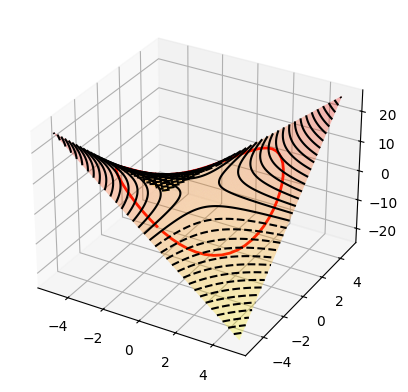

In [4]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='autumn_r', rstride=1, cstride=1,alpha=0.3)
ax.plot3D(x,y,z,lw=2,c='r')
ax.contour(X,Y,Z,40,colors='black')

# Solving multiple equations with Sympy solver

In the following cell demonstrates how multiple euqations can be solved using sumpy.

$f(x,y)=x+y=5$

$g(x,y)=x^2 + y^2 = 17 $

In [5]:
import sympy as sp
x,y = sp.symbols('x,y')
eq1 = sp.Eq(x+y,5)
eq2 = sp.Eq(x**2+y**2,17)
result = sp.solve([eq1,eq2],(x,y))
print(result)

[(1, 4), (4, 1)]


---

# Exercise 1

1. Write down the equations for the constraint optimization (hint:use the concept of lagrange multiplier). 

$f(x,y) = xy + 1$

$g(x,y) = x^2 + y^2 = 16 $

2. Solve the equations using sympy solver to find out the solutions
3. Plot the solutions as 3d point on the surface with the constraint (you need to plot the solutions on the 3d plot already provided above)

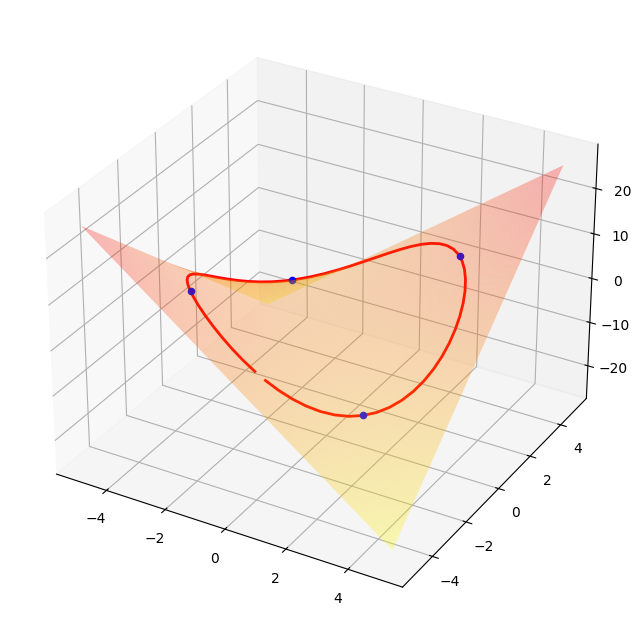

In [6]:
#Anwser exersice 1
import sympy as sp

x,y,lbd = sp.symbols(['x','y','lbd'])
vars = [x, y, lbd]

f = x*y + 1
g = x**2 + y**2 -16
lagranian = f - lbd * g
lagranian_gradient = sp.Matrix([lagranian]).jacobian(vars)
solutions = sp.solve(lagranian_gradient, vars)

x,y = np.linspace(-5,5,300), np.linspace(-5,5,300)
X,Y = np.meshgrid(x,y)
Z = X*Y + 1

r=4
t= np.arange(-np.pi,np.pi, 0.1)
x = r*np.sin(t)
y = r*np.cos(t)
z = x*y+1

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='autumn_r', rstride=1, cstride=1,alpha=0.3)
ax.plot3D(x,y,z,lw=2,c='r')

for sol in solutions:
    ax.scatter(sol[0], sol[1], (sol[0]*sol[1]+1), c='b')

plt.show()

---

# Exercise 2

A gardener has 40 meters of fence-material and wants to fence a rectangle shaped garden with maximal area. 

1. Write down the equations as a constrant optimization problem
2. Plot the surface as 3d surface
3. Plot the constraint in the same axes
4. Write down the lagrange equations
5. Solve the equations using Sympy
6. Plot the solutions on the same axes

{lbd: 5, x: 10, y: 10}


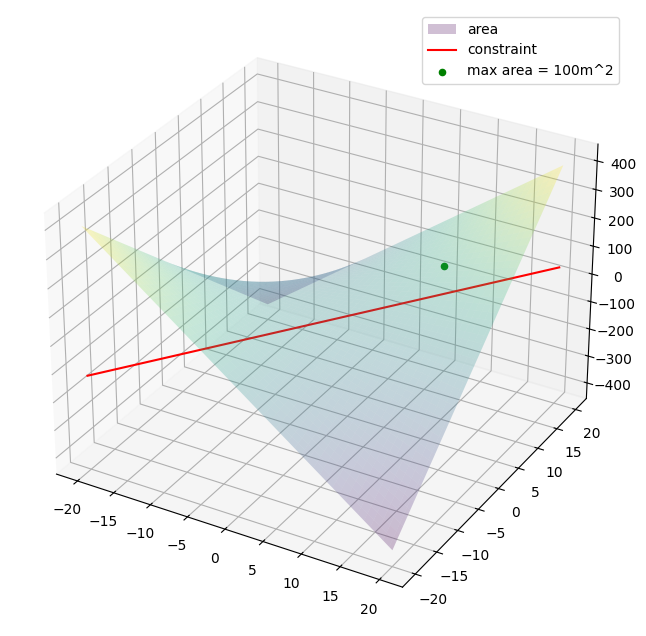

In [7]:
#Anwser exersice 2

x,y,lbd = sp.symbols(['x','y','lbd'])
vars = [x, y, lbd]

f = x*y
g = 2*x + 2*y - 40
lagranian = f - lbd * g
lagranian_gradient = sp.Matrix([lagranian]).jacobian(vars)
solutions = sp.solve(lagranian_gradient, vars)
print(solutions)

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = X*Y

x_constraint = np.linspace(-20, 20, 100)
y_constraint = np.linspace(-20, 20, 100)
z_constraint = 2*x_constraint + 2*y_constraint - 40

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.25, label='area')
ax.plot(x_constraint, y_constraint, z_constraint, c='r', label='constraint')
ax.scatter(10, 10, 100, c ='green', label = 'max area = 100m^2')

plt.legend()
plt.show()